#### Problem Statement:

- Use data about humour style scores as features to predict gender by applying three classification algorithms..

#### Import the environment

In [1]:
# import environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
import sklearn.feature_selection as fs
from collections import Counter
import collections
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

# import scaler environment
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# import logorithm related environemnt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import evluation part environment
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# unable future warning
from warnings import simplefilter

# enable matplotlib
%matplotlib inline

#### Turn off the future warning

In [2]:
simplefilter(action='ignore', category=FutureWarning)

#### import dataset

In [3]:
data = pd.read_csv("data.csv")
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,3,2,3,3,2,5,3,2,3,4,...,4,4,4,2.5,3.3,2.9,3.0,18,2,95
1067,1,4,5,2,4,4,1,2,2,5,...,4,1,2,4.8,3.9,2.5,2.4,31,1,95
1068,1,4,4,5,4,4,3,5,4,3,...,4,1,5,4.4,3.9,3.0,4.3,15,1,95
1069,3,4,4,3,3,4,3,2,4,3,...,4,3,3,3.1,3.6,2.9,2.8,21,2,87


#### first time explore data:
- correlation matrix to explain why we choose these features to predict the target.
- bar chart to explain why we need to remove 3=others in target.
- describe data to explain why we need to remove some useless data.

#### Correlation matrix:
- we can see from the matrix that only two Humor Styles(selfenhancing,agressive), age and accuracy is positive related to the gender, so that's why we choose these features.

(39.0, 0.0)

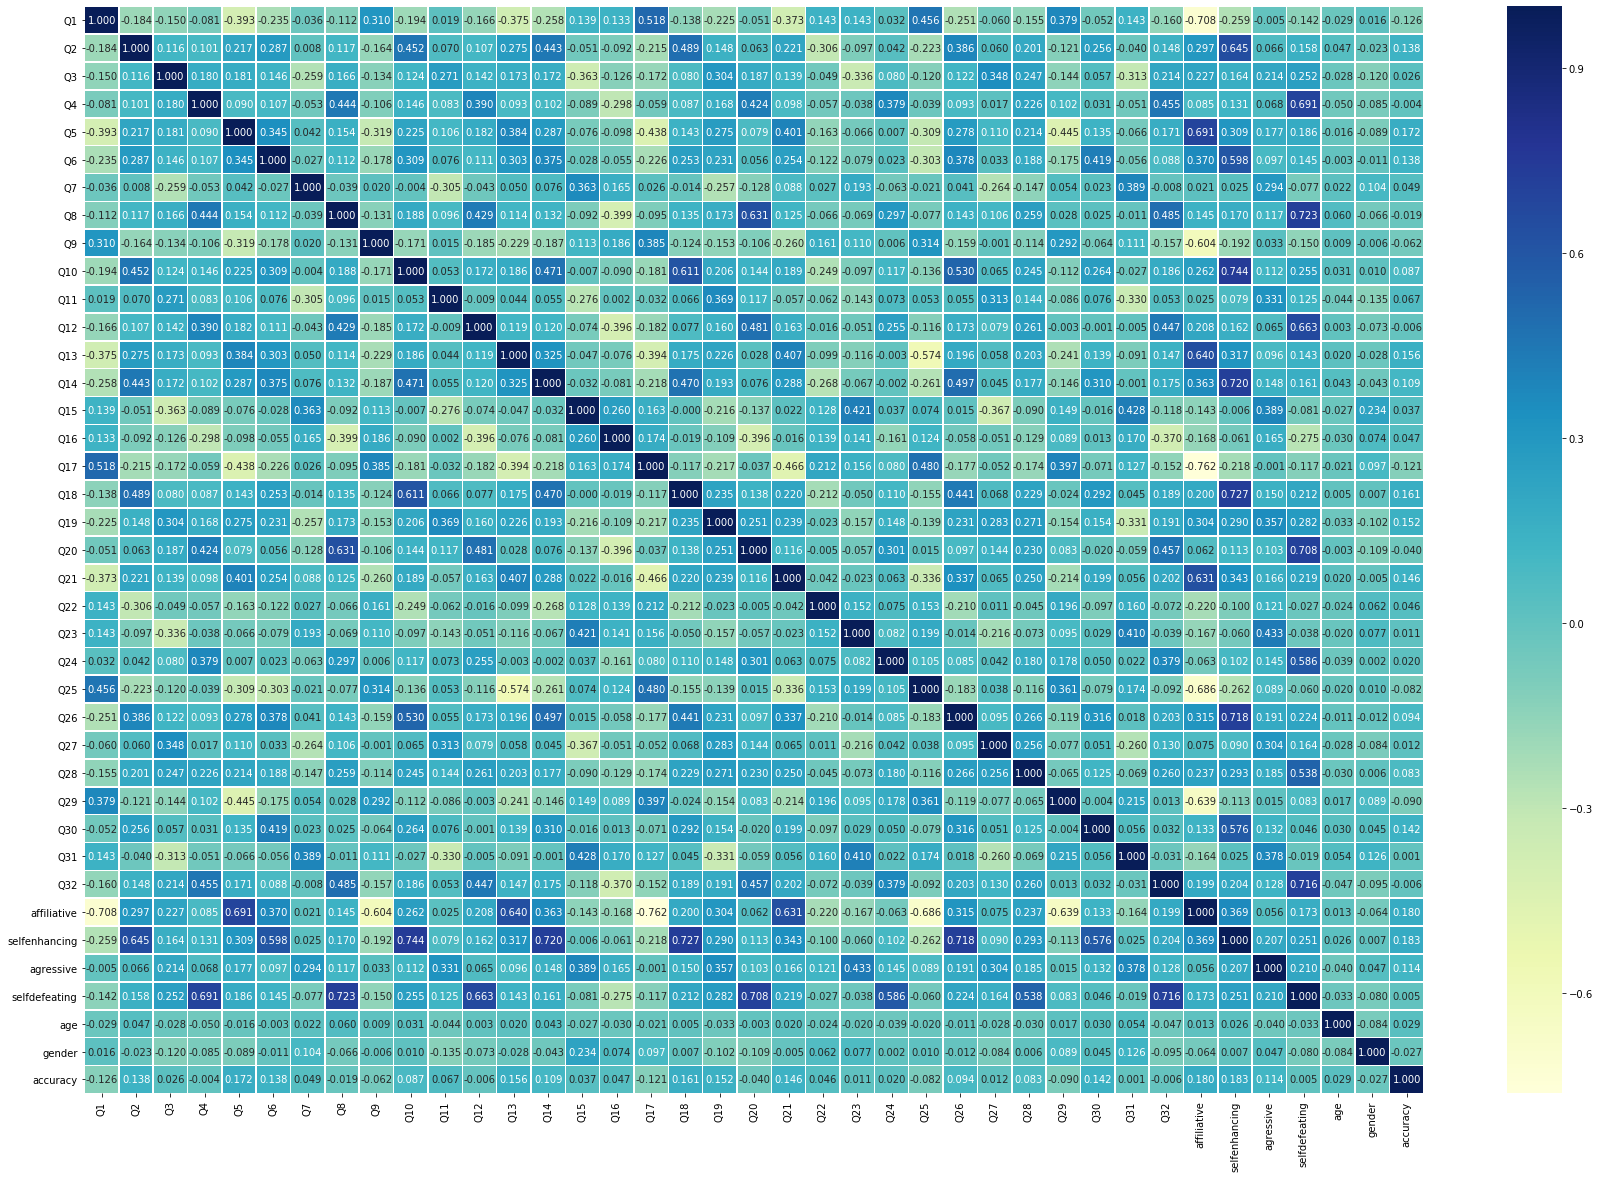

In [4]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".3f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Use bar chart to show the number of each gender:
- reason to delete 0 and 3 is mostly because there is not much data

1    581
2    477
3      8
0      5
Name: gender, dtype: int64

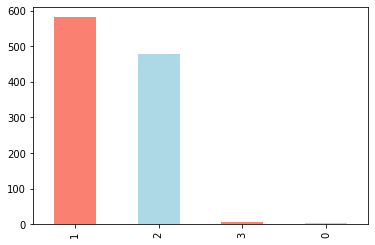

In [5]:
data["gender"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
data["gender"].value_counts()

#### describe data:
- accuracy lower than 90% will be deleted
- max age should be 100 only, and min is 0.

In [6]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.025210,3.342670,3.078431,2.833800,3.599440,4.152194,3.277311,2.535014,2.582633,2.869281,...,3.945845,2.767507,2.838469,4.010644,3.375537,2.956583,2.762745,70.966387,1.455649,87.542484
std,1.075782,1.112898,1.167877,1.160252,1.061281,0.979315,1.099974,1.231380,1.224530,1.205013,...,1.135189,1.309601,1.233889,0.708479,0.661533,0.410870,0.645982,1371.989249,0.522076,12.038483
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.300000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,2.900000,2.800000,2.300000,18.500000,1.000000,80.000000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.400000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,95.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,44849.000000,3.000000,100.000000


#### Clean data
- gender should only be 1 and 2, 3 and 0 we need to delete it. (1 male and 2 is female) Reason to delete 3 is because there is no more data for gender as 3.
- accuracy lower than 50% should be deleted
- max age should be 100 only, and min is 0.
- -1 in quesstion should be removed.

In [7]:
another_data = pd.read_csv("data.csv")
another_data["mod_ac"] = pd.cut(another_data.accuracy, bins = [0,10,20,30,40,50,60,70,80,90,100])
another_data["mod_ac"].value_counts()

(90, 100]    391
(80, 90]     376
(70, 80]     212
(60, 70]      50
(50, 60]      26
(40, 50]       8
(0, 10]        5
(30, 40]       2
(20, 30]       1
(10, 20]       0
Name: mod_ac, dtype: int64

In [8]:
drop_index_name = data[(data['gender'] == 0) | (data['gender'] == 3) | (data['age'] > 100) | 
                       (data['age'] < 0) | (data['accuracy'] < 70)].index
data.drop(drop_index_name, inplace = True)
data.describe()
data = data[(data != -1).all(axis=1)]

In [9]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,...,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,2.004310,3.364224,3.085129,2.825431,3.645474,4.182112,3.314655,2.542026,2.586207,2.870690,...,3.983836,2.801724,2.840517,4.034159,3.399892,2.973491,2.765517,26.390086,1.447198,89.423491
std,1.051009,1.084803,1.165984,1.159232,1.025227,0.949776,1.083425,1.197967,1.209056,1.187167,...,1.057545,1.287026,1.229973,0.696615,0.639925,0.385229,0.638952,10.955278,0.497472,8.378233
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.300000,1.000000,1.000000,1.000000,14.000000,1.000000,70.000000
25%,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,3.600000,3.000000,2.800000,2.300000,19.000000,1.000000,84.750000
50%,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,3.000000,...,4.000000,3.000000,3.000000,4.100000,3.500000,3.000000,2.800000,23.000000,1.000000,90.000000
75%,3.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.250000,3.000000,4.000000,...,5.000000,4.000000,4.000000,4.500000,3.800000,3.300000,3.100000,31.000000,2.000000,96.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,2.000000,100.000000


#### Feature Selection


In [10]:
X = data.drop(["gender"],axis=1)
StandardScaler = preprocessing.StandardScaler()
Standard_scaled = StandardScaler.fit_transform(X)
X = pd.DataFrame(Standard_scaled,columns = X.columns.values,index=X.index)
y = data["gender"]

In [11]:
log_model = LogisticRegression()
log_model.fit(X, y)
selector = SelectFromModel(log_model, prefit=True)
X_new = selector.transform(X)
feature_index = selector.get_support()
feature_name = X.columns[feature_index]
X_new = pd.DataFrame(X_new, columns=feature_name)

/Users/vincentzhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [12]:
X_new

,Q1,Q3,Q4,Q9,Q11,Q12,Q15,Q17,Q19,Q23,Q27,Q29,Q30,Q31,selfenhancing,agressive,age
0,-0.004103,-0.073050,-1.575539,1.169967,0.213190,-1.623501,0.420920,0.077035,-0.198624,0.169036,-0.210893,-0.263307,0.015293,-0.623263,0.156521,0.068850,-0.126956
1,-0.004103,-0.931157,-0.712434,1.169967,1.017420,0.035760,1.160720,0.077035,-0.198624,1.012401,-0.996874,1.439472,0.015293,0.154140,0.156521,0.848028,1.608303
2,0.947876,-0.073050,0.150671,-0.485108,0.213190,-0.793870,-0.318879,0.077035,-1.010620,1.012401,0.575087,-0.263307,0.961389,0.931544,0.781932,0.328576,2.156280
3,-0.956083,-0.931157,-0.712434,1.169967,-0.591039,-0.793870,0.420920,0.077035,-1.010620,0.169036,-0.210893,-0.263307,0.961389,0.931544,1.094637,-0.190876,2.338939
4,-0.004103,0.785057,-1.575539,-0.485108,0.213190,0.035760,-0.318879,1.005455,1.425368,0.169036,-0.210893,-1.114696,0.961389,-0.623263,1.094637,0.848028,0.695009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,0.947876,-0.073050,0.150671,0.342429,-1.395269,0.865390,0.420920,1.933875,-1.010620,0.169036,0.575087,2.290861,0.015293,0.931544,-0.156184,-0.190876,-0.766262
924,-0.956083,1.643164,-0.712434,-0.485108,-0.591039,-0.793870,-1.798478,-0.851385,0.613372,-1.517693,2.147048,-1.114696,0.015293,-1.400667,0.781932,-1.229780,0.421021
925,-0.956083,0.785057,1.876882,1.169967,1.017420,1.695021,-1.058679,-0.851385,0.613372,-0.674328,1.361067,-0.263307,0.015293,-1.400667,0.781932,0.068850,-1.040250
926,0.947876,0.785057,0.150671,1.169967,0.213190,-0.793870,-0.318879,1.005455,-0.198624,-0.674328,-0.210893,0.588083,0.015293,0.154140,0.312874,-0.190876,-0.492273


#### Check data

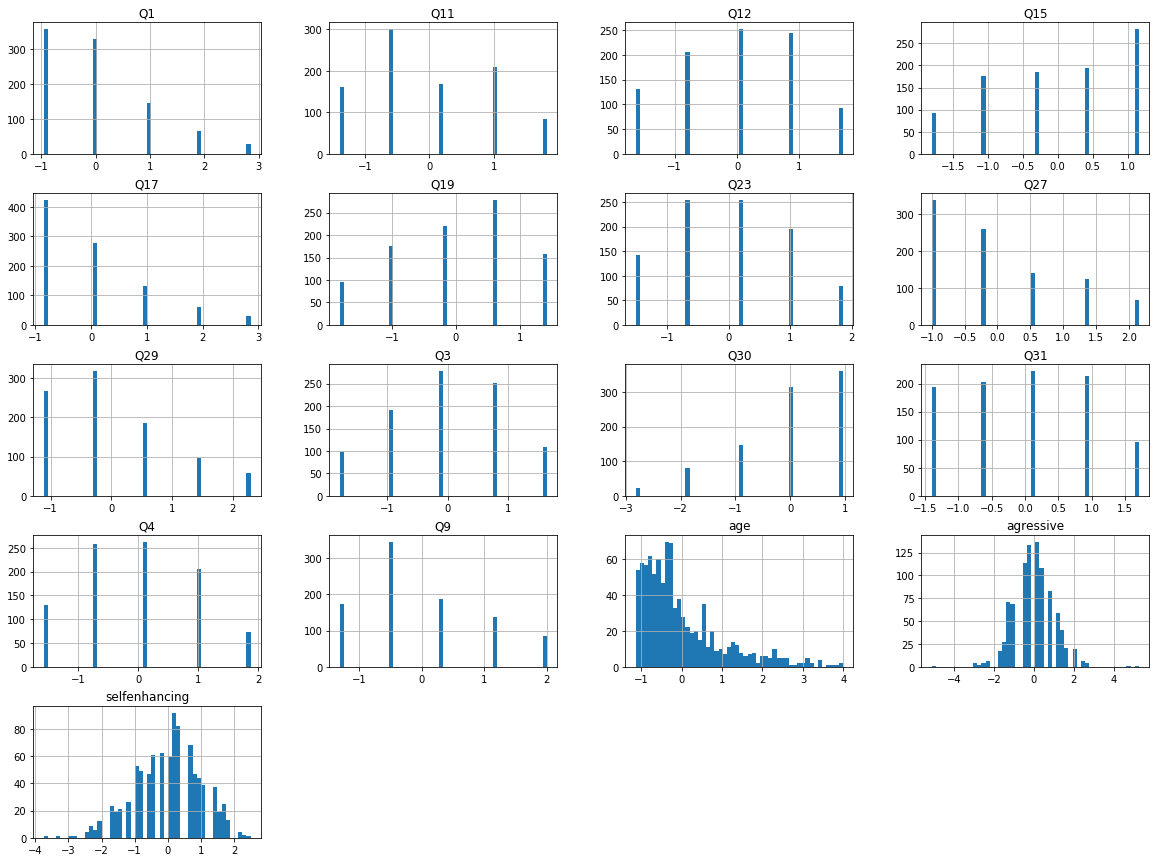

In [13]:
# histograms:
# A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
X_new.hist(bins=50, figsize=(20,15))
plt.show()

#### Remove imbalance data

In [14]:
data = data[["Q11","Q12","Q15","Q19","Q23","Q3","Q31","Q4","agressive","selfenhancing","gender"]]
X = data.drop(["gender"],axis=1)
y = data["gender"]
X_list = ["Q11","Q12","Q15","Q19","Q23","Q3","Q31","Q4","agressive","selfenhancing"]

#### Check data and data evaluation

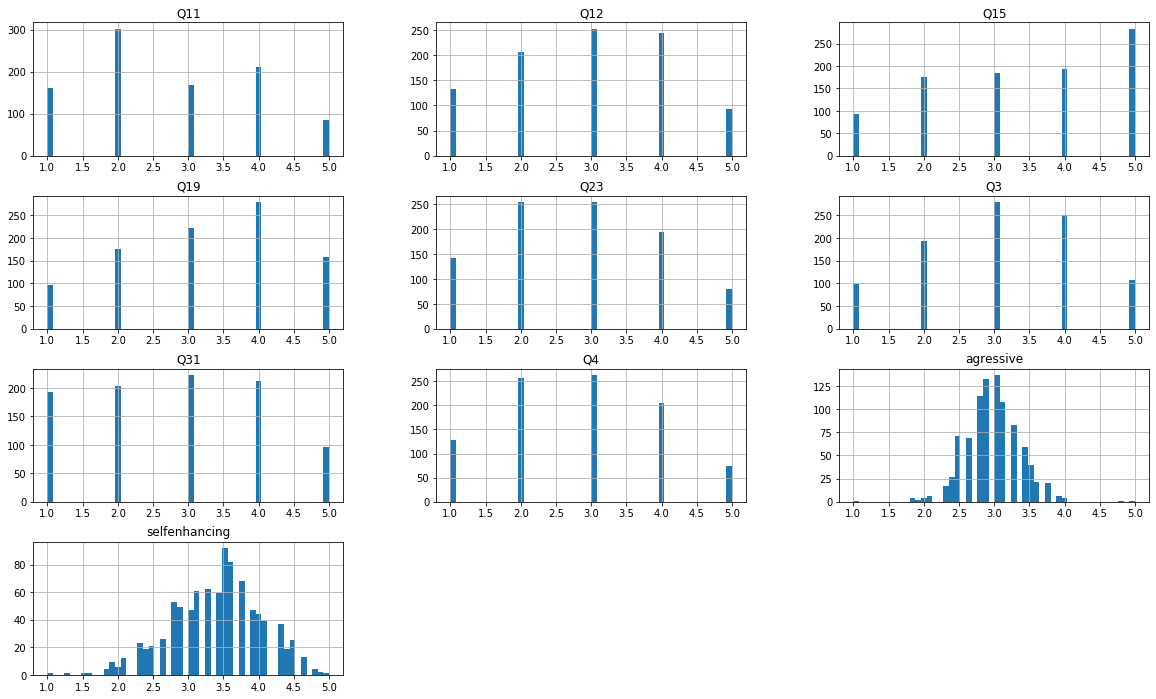

In [15]:
# histograms:
# A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
X.hist(bins=50, figsize=(20,12))
plt.show()

1    513
2    415
Name: gender, dtype: int64

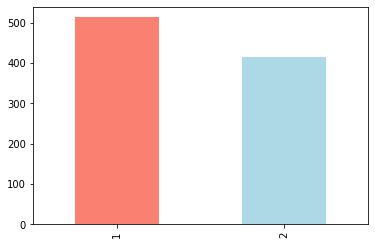

In [16]:
y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
y.value_counts()

#### Scale the data:

In [17]:
# StandardScaler
StandardScaler = preprocessing.StandardScaler()
Standard_scaled = StandardScaler.fit_transform(X)
Standard_scaled_df = pd.DataFrame(Standard_scaled,columns = X.columns.values,index=X.index)
# MinMaxScaler
MinMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
MinMax_scaled = MinMaxScaler.fit_transform(X)
MinMax_scaled_df = pd.DataFrame(MinMax_scaled,columns = X.columns.values,index=X.index)
# Robust Scaler
Robust_Scaler = preprocessing.RobustScaler()
robust_scaled = Robust_Scaler.fit_transform(X)
robust_scaled_df = pd.DataFrame(robust_scaled,columns = X.columns.values,index=X.index)

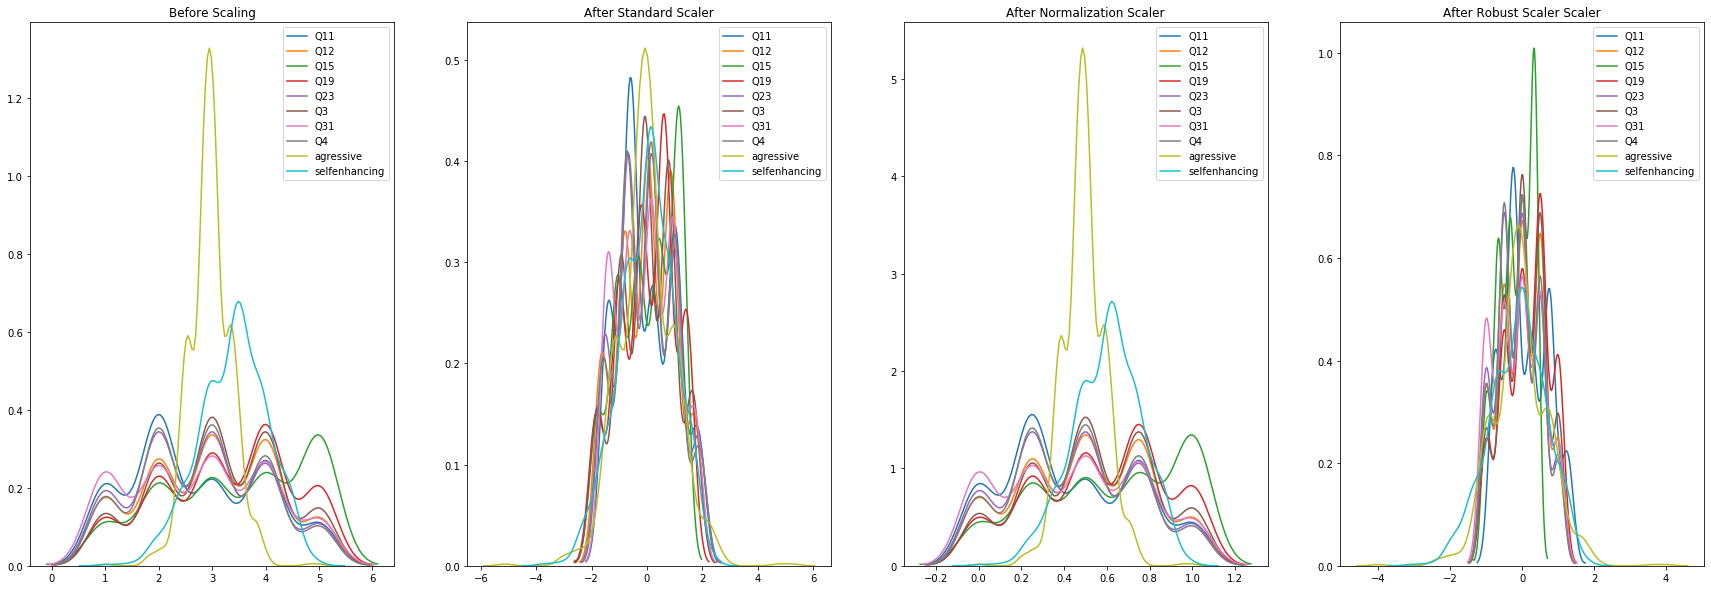

In [18]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(30, 10))
ax1.set_title('Before Scaling')
for i in X_list:
    sns.kdeplot(X[i], ax=ax1)
ax2.set_title('After Standard Scaler')
for i in X_list:
    sns.kdeplot(Standard_scaled_df[i], ax=ax2)
ax3.set_title('After Normalization Scaler')
for i in X_list:
    sns.kdeplot(MinMax_scaled_df[i], ax=ax3)
ax4.set_title('After Robust Scaler Scaler')
for i in X_list:
    sns.kdeplot(robust_scaled_df[i], ax=ax4)
plt.show()

In [19]:
X = Standard_scaled_df

#### Second time explore data:

1    513
2    415
Name: gender, dtype: int64


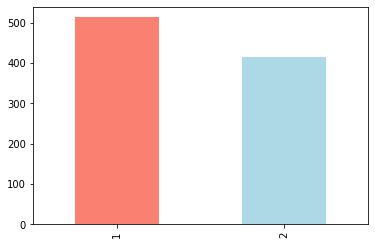

In [20]:
# The total class
data["gender"].value_counts()
data["gender"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
print(data["gender"].value_counts())

In [21]:
# missing values
data.isna().sum()

Q11              0
Q12              0
Q15              0
Q19              0
Q23              0
Q3               0
Q31              0
Q4               0
agressive        0
selfenhancing    0
gender           0
dtype: int64

(10.0, 0.0)

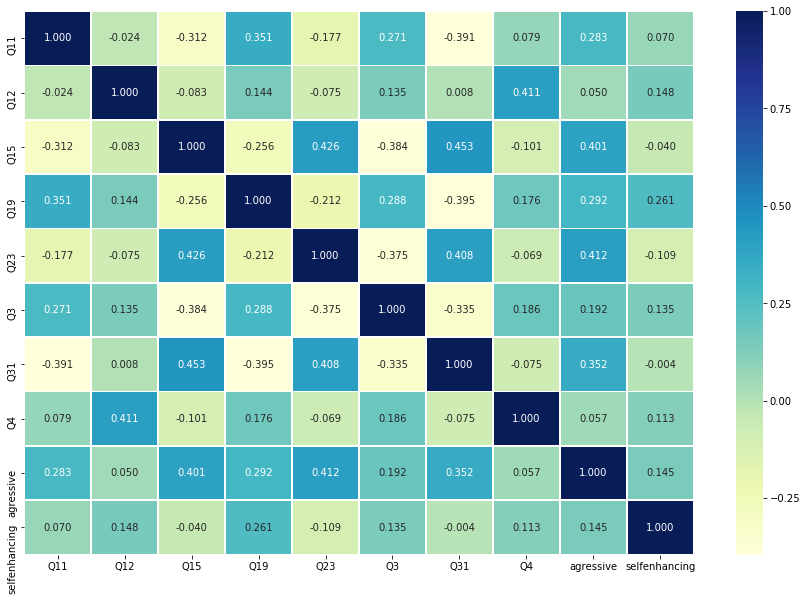

In [22]:
# correlation matrix
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.6,
                 fmt=".3f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

/Users/vincentzhao/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vincentzhao/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


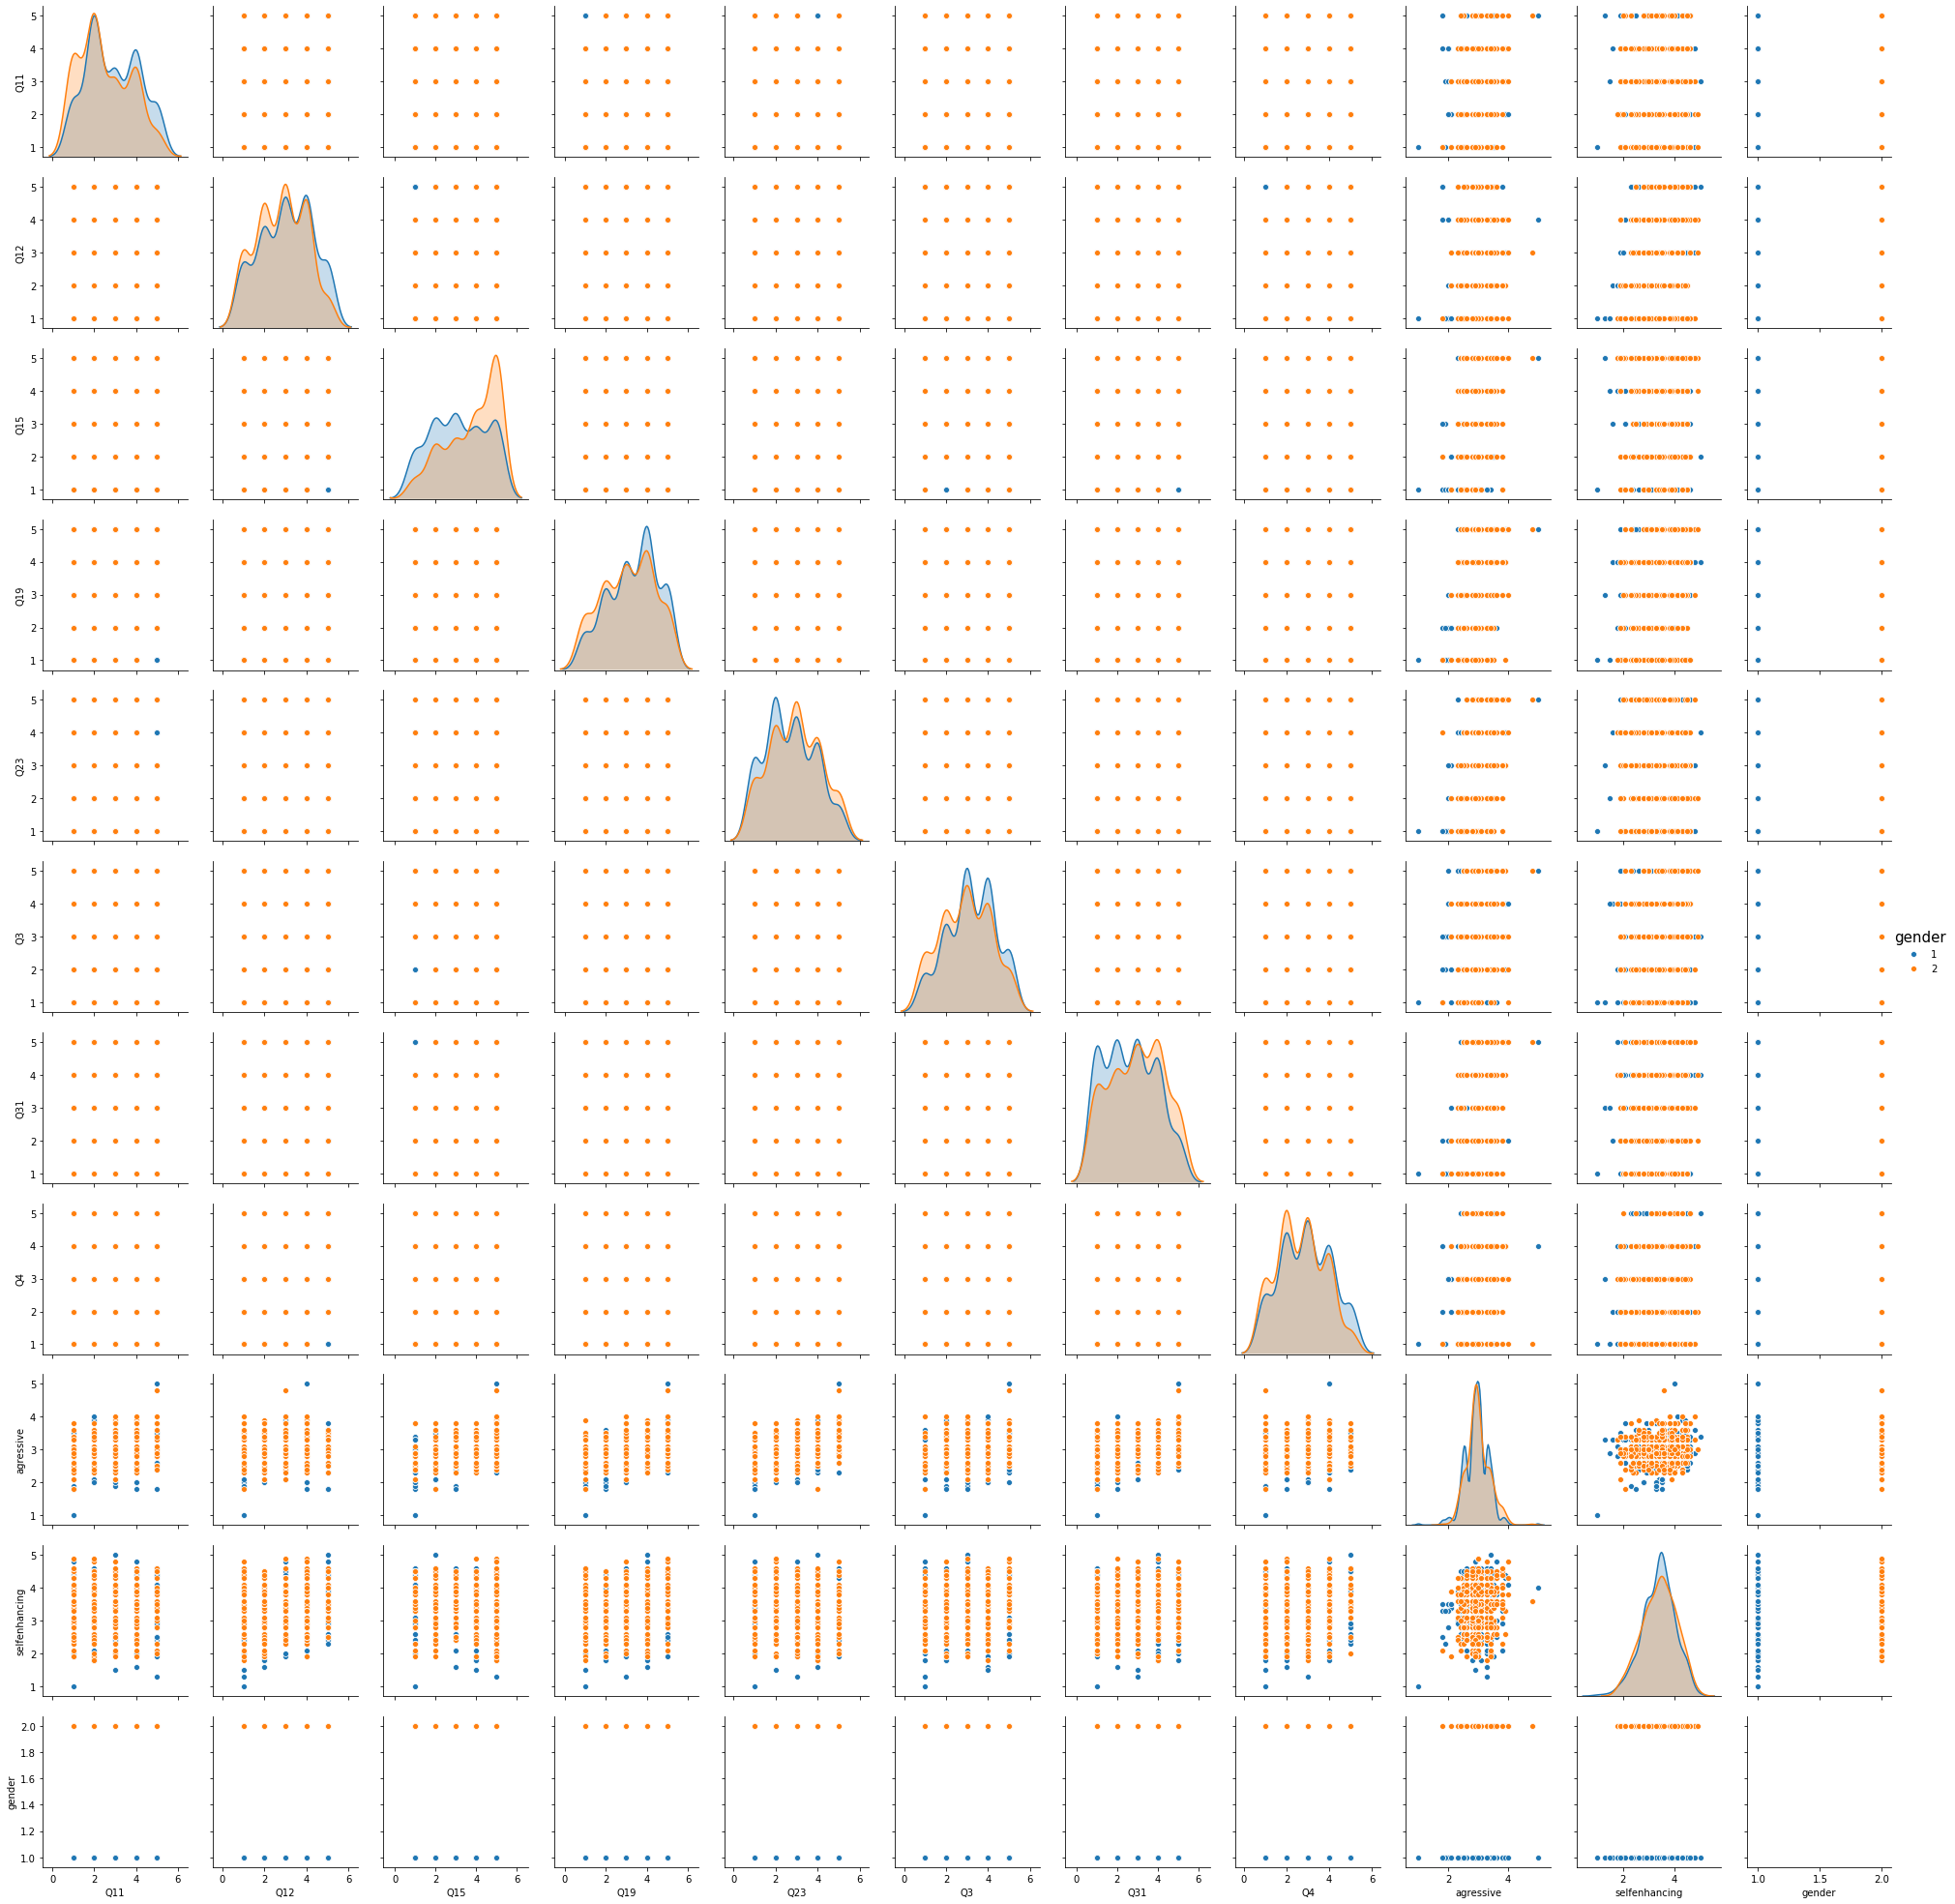

In [23]:
# pairplot
g = sns.pairplot(data,hue="gender")
g._legend.get_title().set_fontsize(15)
plt.show()

In [24]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,random_state=42)

#### variance:

In [25]:
# Select features by using variance
# var = fs.VarianceThreshold(threshold=0.2)
# var.fit(X)
# X_trans = var.transform(X)

#### Models:

In [26]:
models = {"Logistic Regression":LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    confusion_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train.values.ravel())
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_test)
        confusion_scores[name] = metrics.accuracy_score(y_test, y_pred) * 100
        model_scores[name] = model.score(X_test, y_test) * 100
    return model_scores,confusion_scores

model_scores,confusion_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores,confusion_scores

({'Logistic Regression': 63.97849462365591,
  'Random Forest': 60.752688172043015,
  'SVC': 63.97849462365591},
 {'Logistic Regression': 63.97849462365591,
  'Random Forest': 60.752688172043015,
  'SVC': 63.97849462365591})

In [27]:
def classification_report(models, X_train, X_test, y_train, y_test):
    
    # Set random seed
    np.random.seed(42)
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        classification_report = metrics.classification_report(y_test, y_pred)
        print(name + "\n" +  classification_report)

classification_report(models=models,
            X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test)

Logistic Regression
              precision    recall  f1-score   support

           1       0.67      0.74      0.70       106
           2       0.59      0.51      0.55        80

    accuracy                           0.64       186
   macro avg       0.63      0.62      0.62       186
weighted avg       0.64      0.64      0.64       186

Random Forest
              precision    recall  f1-score   support

           1       0.65      0.69      0.67       106
           2       0.55      0.50      0.52        80

    accuracy                           0.61       186
   macro avg       0.60      0.59      0.59       186
weighted avg       0.60      0.61      0.60       186

SVC
              precision    recall  f1-score   support

           1       0.66      0.77      0.71       106
           2       0.61      0.46      0.52        80

    accuracy                           0.64       186
   macro avg       0.63      0.62      0.62       186
weighted avg       0.63      0.64   

,model,cv_acc,cv_precision,cv_recall,cv_f1
0,Logistic Regression,0.599217,0.623317,0.703884,0.66022
1,Random Forest,0.602384,0.628673,0.709842,0.66888
2,SVC,0.630365,0.643646,0.746644,0.69068


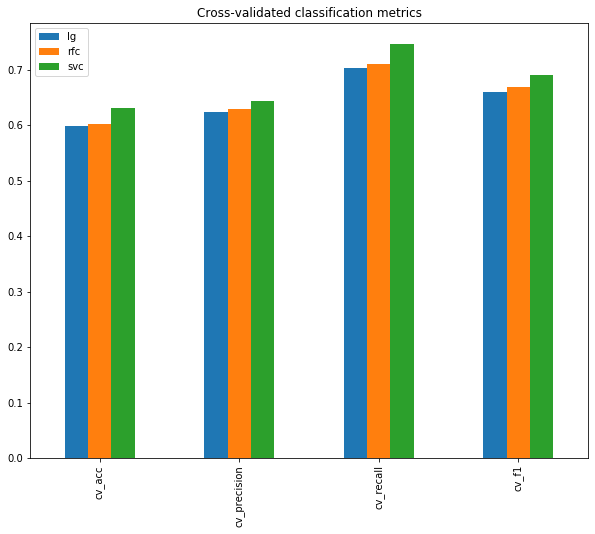

In [28]:
cv_table = []
cv_plot = []
for name,model in models.items():
    cv_acc = np.mean(cross_val_score(model,
                         X_new,
                         y.values.ravel(),
                         cv=10,
                         scoring="accuracy"))
    cv_precision = np.mean(cross_val_score(model,
                         X_new,
                         y.values.ravel(),
                         cv=10,
                         scoring="precision"))
    cv_recall = np.mean(cross_val_score(model,
                         X_new,
                         y.values.ravel(),
                         cv=10,
                         scoring="recall"))
    cv_f1 = np.mean(cross_val_score(model,
                         X_new,
                         y.values.ravel(),
                         cv=10,
                         scoring="f1"))
    cv_table.append(
    {
        'model': name,
        'cv_acc': cv_acc,
        'cv_precision': cv_precision,
        'cv_recall': cv_recall,
        'cv_f1': cv_f1
    })
    cv_plot.append(
    {
        'cv_acc': cv_acc,
        'cv_precision': cv_precision,
        'cv_recall': cv_recall,
        'cv_f1': cv_f1
    })
compare_metrics = pd.DataFrame({"lg": cv_plot[0],
                                "rfc": cv_plot[1],
                                "svc": cv_plot[2]}
                              )
compare_metrics.plot.bar(figsize=(10,8),title="Cross-validated classification metrics")
cv_table = pd.DataFrame(cv_table,columns=['model','cv_acc','cv_precision','cv_recall','cv_f1'])
cv_table

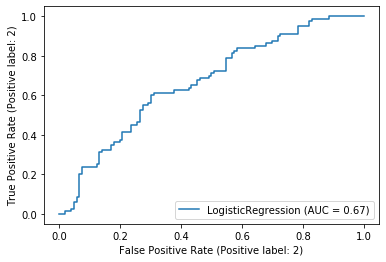

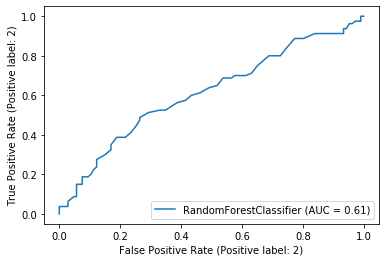

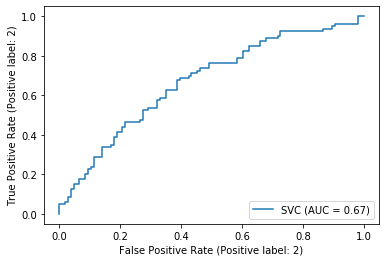

In [29]:
for name, model in models.items():
        model.fit(X_train, y_train.values.ravel())
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_test)
        plot_roc_curve(model, X_test, y_test)

#### Compare  Models:

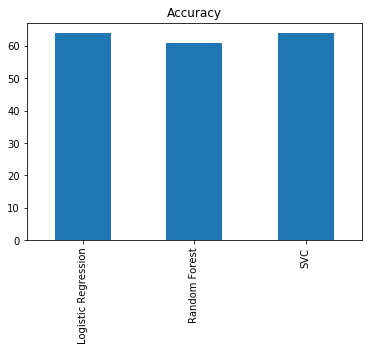

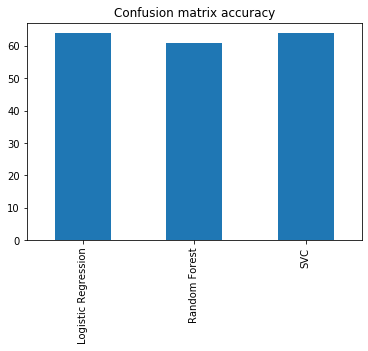

In [30]:
model_compare_acc = pd.DataFrame(model_scores,index=["accuracy"])
model_compare_cof = pd.DataFrame(confusion_scores,index=["accuracy"])
model_compare_acc.T.plot.bar(title="Accuracy", legend=False)
model_compare_cof.T.plot.bar(title="Confusion matrix accuracy", legend=False)

#### Evolution  Models:
- Turn hypeparameters by using GridSearch
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
- Feature Importance

#### Turn hypeparameters by using GridSearch

In [31]:
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            
            'C': np.logspace(-1, 0, 30),
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': [5,10,8,9,15],
            'n_estimators': [300,250,150,280,290]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'kernel': ['rbf'],
            'C': np.logspace(-1, 0, 30),
            'gamma': ['scale','auto']
        }
    }
}
scores = []
for name,model in model_params.items():
    clf = GridSearchCV(model['model'],model['params'], cv=10,return_train_score=False)
    clf.fit(X_train, y_train.values.ravel())
    scores.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
})
#     can put matrix in and find the the better params
#     also can make a graph about how to choose the hypara

In [32]:
scores

[{'model': 'Logistic Regression',
  'best_score': 0.6213333333333334,
  'best_params': {'C': 0.30391953823131973, 'solver': 'newton-cg'}},
 {'model': 'Random Forest',
  'best_score': 0.6226666666666667,
  'best_params': {'max_depth': 8, 'n_estimators': 150}},
 {'model': 'SVC',
  'best_score': 0.6132792792792793,
  'best_params': {'C': 0.6210169418915616, 'gamma': 'scale', 'kernel': 'rbf'}}]

#### Calculate evaluation metrics using cross-validation

,model,cv_acc,cv_precision,cv_recall,cv_f1
0,gs_lg,0.610963,0.633455,0.703846,0.666253
1,gs_rfc,0.609935,0.623561,0.723115,0.666330
2,gs_svc,0.614236,0.619875,0.781448,0.690739


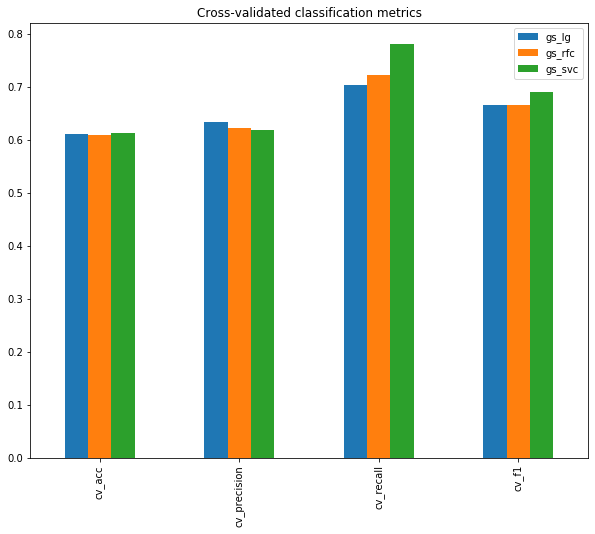

In [33]:
new_models = {
    'gs_lg':LogisticRegression(C=scores[0]['best_params']['C'],solver=scores[0]['best_params']['solver']),
    'gs_rfc':RandomForestClassifier(max_depth=scores[1]['best_params']['max_depth'],n_estimators=scores[1]['best_params']['n_estimators']),
    'gs_svc':SVC(C=scores[2]['best_params']['C'], gamma = scores[2]['best_params']['gamma'],kernel = scores[2]['best_params']['kernel'])
}
cv_table = []
cv_plot = []
for name,model in new_models.items():
    cv_acc = np.mean(cross_val_score(model,
                         X,
                         y.values.ravel(),
                         cv=10,
                         scoring="accuracy"))
    cv_precision = np.mean(cross_val_score(model,
                         X,
                         y.values.ravel(),
                         cv=10,
                         scoring="precision"))
    cv_recall = np.mean(cross_val_score(model,
                         X,
                         y.values.ravel(),
                         cv=10,
                         scoring="recall"))
    cv_f1 = np.mean(cross_val_score(model,
                         X,
                         y.values.ravel(),
                         cv=10,
                         scoring="f1"))
    cv_table.append(
    {
        'model': name,
        'cv_acc': cv_acc,
        'cv_precision': cv_precision,
        'cv_recall': cv_recall,
        'cv_f1': cv_f1
    })
    cv_plot.append(
    {
        'cv_acc': cv_acc,
        'cv_precision': cv_precision,
        'cv_recall': cv_recall,
        'cv_f1': cv_f1
    })
compare_metrics = pd.DataFrame({"gs_lg": cv_plot[0],
                                "gs_rfc": cv_plot[1],
                                "gs_svc": cv_plot[2]}
                              )
compare_metrics.plot.bar(figsize=(10,8),title="Cross-validated classification metrics")
cv_table = pd.DataFrame(cv_table,columns=['model','cv_acc','cv_precision','cv_recall','cv_f1'])
cv_table

### classification_report

In [34]:

for name, model in new_models.items():
    model.fit(X_train, y_train.values.ravel())
    # Evaluate the model and append its score to model_scores
    y_pred = model.predict(X_test)
    report = metrics.classification_report(y_test, y_pred)
    print(name + '\n',report)

gs_lg
               precision    recall  f1-score   support

           1       0.67      0.74      0.70       106
           2       0.59      0.51      0.55        80

    accuracy                           0.64       186
   macro avg       0.63      0.62      0.62       186
weighted avg       0.64      0.64      0.64       186

gs_rfc
               precision    recall  f1-score   support

           1       0.67      0.77      0.72       106
           2       0.62      0.50      0.56        80

    accuracy                           0.66       186
   macro avg       0.65      0.64      0.64       186
weighted avg       0.65      0.66      0.65       186

gs_svc
               precision    recall  f1-score   support

           1       0.65      0.81      0.72       106
           2       0.63      0.42      0.51        80

    accuracy                           0.65       186
   macro avg       0.64      0.62      0.62       186
weighted avg       0.64      0.65      0.63       1

### Confusion matrix

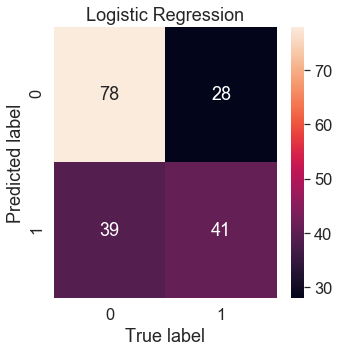

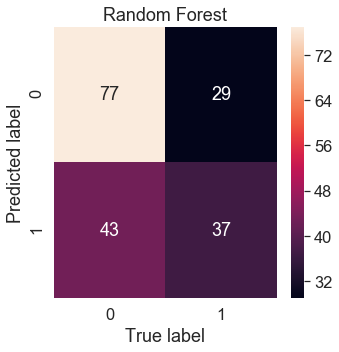

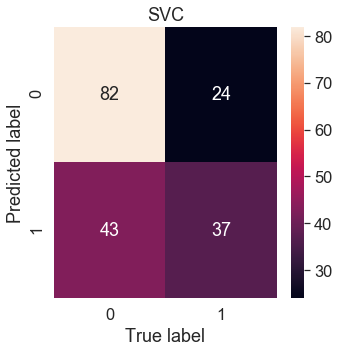

In [35]:
sns.set(font_scale=1.5)
report = []
def plot_conf_mat(y_test, y_preds,name):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title(name)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
for name, model in models.items():
        model.fit(X_train, y_train.values.ravel())
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_test)
        plot_conf_mat(y_test, y_pred,name)

### ROC curve and AUC score

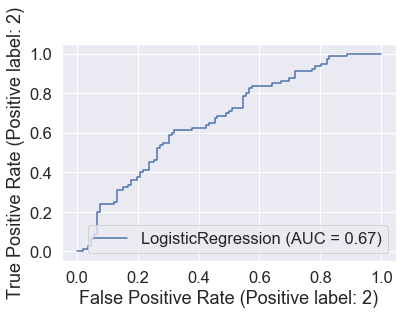

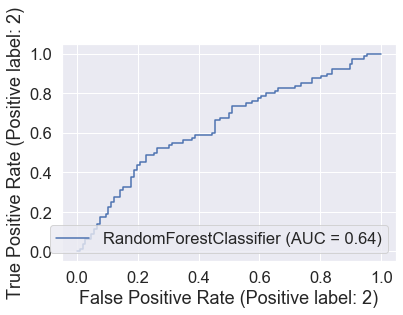

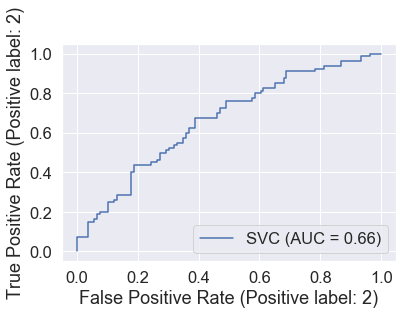

In [36]:
for name, model in new_models.items():
        model.fit(X_train, y_train.values.ravel())
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_test)
        plot_roc_curve(model, X_test, y_test)

### Feature Importance

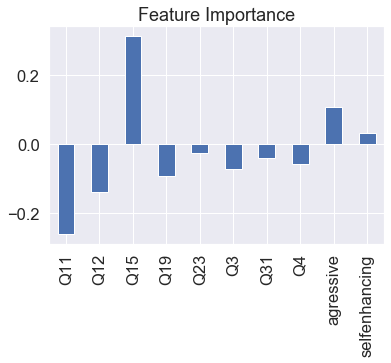

In [37]:
gd_lg = new_models['gs_lg']
gd_lg.fit(X_train, y_train.values.ravel())
# Evaluate the model and append its score to model_scores
y_pred = gd_lg.predict(X_test)
feature_dict = dict(zip(data.columns, list(gd_lg.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)